## Analyzing the learning and performance of a model

In [2]:
from data_preparation import downloadData, loadData

train, test = downloadData(download=False)
train_l, test_l = loadData(train, test)
classes_names=train_l.dataset.classes
print(classes_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
train_iter=iter(train_l)
test_iter=iter(test_l)

#### Looking at some images

In [4]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def show_image(batch):
    images, labels = batch
    images=torchvision.utils.make_grid(images[:4])
    images=images/2+0.5
    npimages=images.numpy()
    
    plt.figure(figsize=(7,5))
    plt.imshow(np.transpose(npimages,(1,2,0)))
    plt.show()
    print(' '.join('%5s' % classes_names[labels[j]] for j in range(4)))

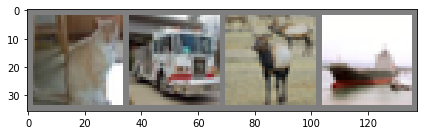

  cat truck  deer  ship


In [5]:
show_image(train_iter.next())


### Predicted classes for images


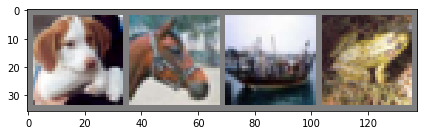

  dog horse  ship  frog


RuntimeError: Error(s) in loading state_dict for MyNet:
	Missing key(s) in state_dict: "conv4.weight", "conv4.bias", "conv5.weight", "conv5.bias". 
	size mismatch for conv1.weight: copying a param with shape torch.Size([8, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([10, 3, 3, 3]).
	size mismatch for conv1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([10]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([16, 8, 4, 4]) from checkpoint, the shape in current model is torch.Size([16, 10, 3, 3]).
	size mismatch for conv3.weight: copying a param with shape torch.Size([32, 16, 3, 3]) from checkpoint, the shape in current model is torch.Size([24, 16, 3, 3]).
	size mismatch for conv3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 800]) from checkpoint, the shape in current model is torch.Size([256, 4000]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([16, 128]) from checkpoint, the shape in current model is torch.Size([32, 256]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([10, 16]) from checkpoint, the shape in current model is torch.Size([10, 32]).

In [7]:
import model
import torch
test_batch=test_iter.next()
show_image(test_batch)
inputs, labels = test_batch

my_model=model.load_model("./SavedModel1")

predictions=my_model(inputs)
_, argmax_predictions = torch.max(predictions.data, 1)

print("And now predicted:")
print(' '.join('%5s' % classes_names[argmax_predictions[j]] for j in range(4)))




### Confusion matrix

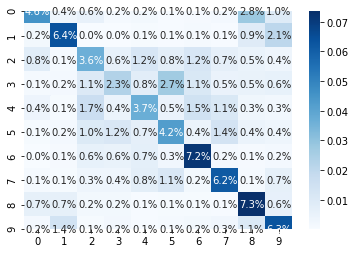

In [11]:
from sklearn import metrics
import seaborn

labels_l=np.loadtxt("LabelsTest2.csv",delimiter=',')
predictions_l=np.loadtxt("PredictionsTest2.csv",delimiter=',')

conf_matrix=metrics.confusion_matrix(labels_l,predictions_l)

seaborn.heatmap(conf_matrix/np.sum(conf_matrix),
                annot=True,
                fmt=".1%",
                cmap="Blues")
